In [19]:
pip install pytrends matplotlib pandas seaborn plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

## setup pytrend lib and keyword define

In [21]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword="internship"

## data request 

In [27]:
pytrends.build_payload( [keyword], cat=0, timeframe='today 12-m', geo='',gprop='')

## county wise intrest

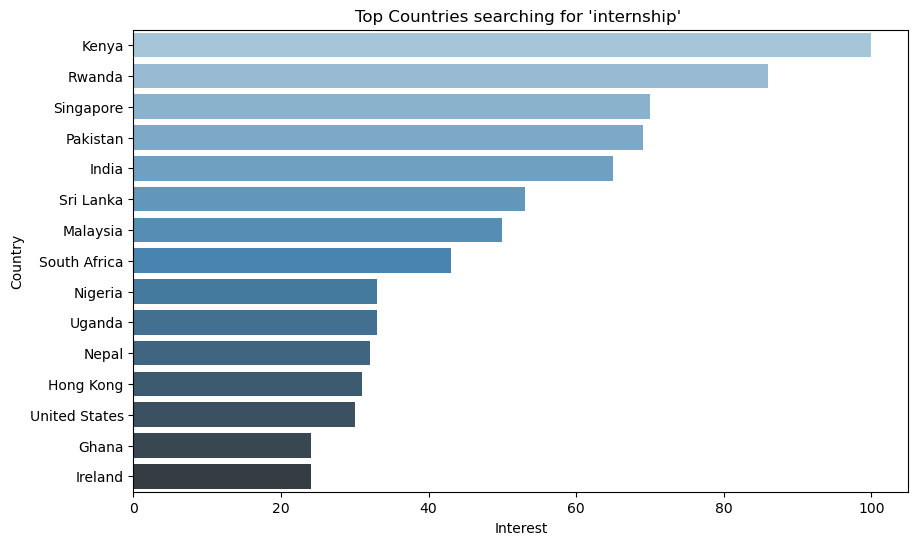

In [28]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False).head(15)

plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

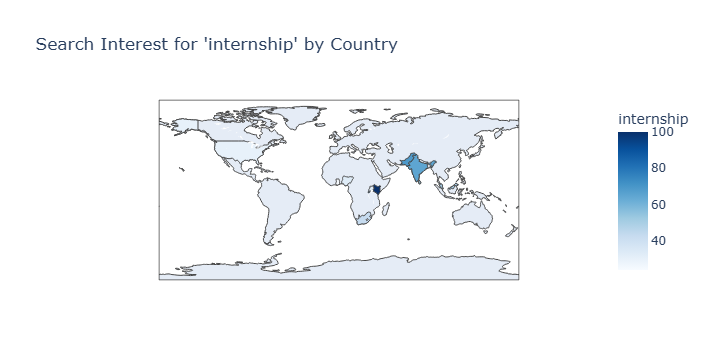

In [29]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"Search Interest for '{keyword}' by Country",
                    color_continuous_scale='Blues')

fig.show()

## time wise intrest

In [30]:
time_df= pytrends.interest_over_time()

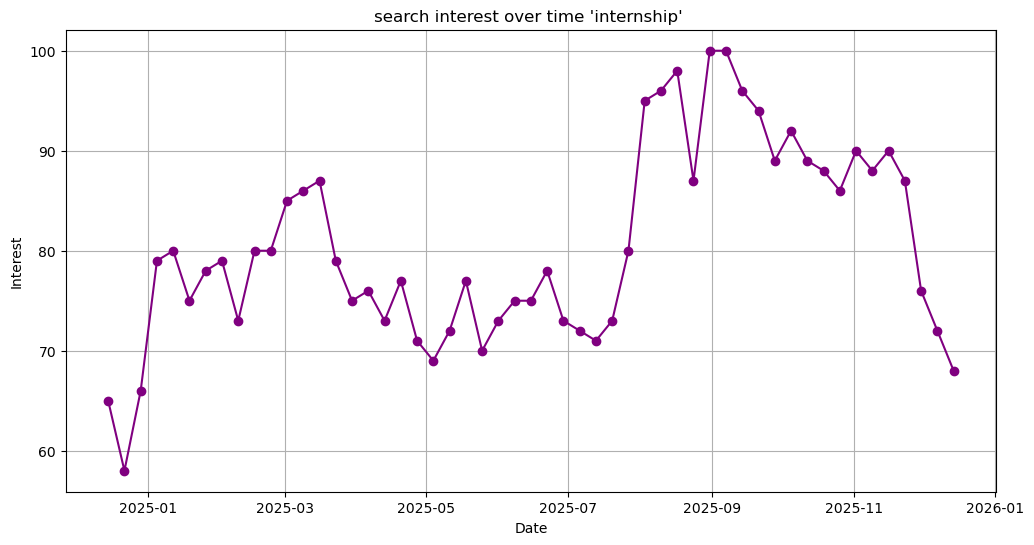

In [31]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

## multiple key words compare

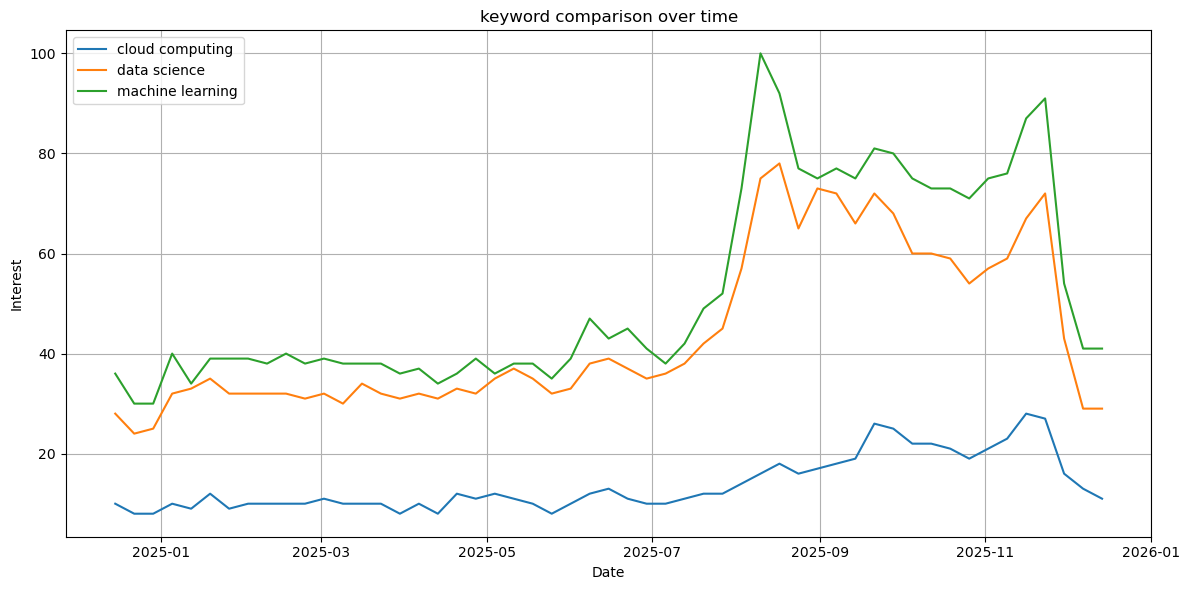

In [34]:
kw_list = ["cloud computing", "data science", "machine learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

compare_df = pytrends.interest_over_time()

plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)

plt.title("keyword comparison over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pytrends.request import TrendReq


In [36]:
pytrends = TrendReq(
    hl='en-US',
    tz=330
)


In [37]:
skills = {
    "programming_languages": [
        "Python", "Java", "C++", "JavaScript"
    ],
    "data_and_ml": [
        "Machine Learning", "Data Science", "Deep Learning"
    ],
    "cloud_and_devops": [
        "AWS", "Docker", "Kubernetes"
    ]
}


In [38]:
TIMEFRAME = '2019-01-01 2024-12-31'
GEO = ''


In [40]:
#data pull (single skill, sanity check)

pytrends.build_payload(
    kw_list=["Python"],
    timeframe=TIMEFRAME,
    geo=GEO
)

python_trend = pytrends.interest_over_time()
python_trend.head()


,Python,isPartial
date,,
2019-01-01,59,False
2019-02-01,63,False
2019-03-01,63,False
2019-04-01,67,False
2019-05-01,62,False


In [41]:
python_trend.describe()


,Python
count,72.000000
mean,74.777778
std,12.555479
min,54.000000
25%,63.000000
50%,74.000000
75%,83.000000
max,100.000000


In [42]:
#Function to fetch trend data (clean and reusable)
def fetch_trend_data(keyword, timeframe, geo=''):
    pytrends.build_payload(
        kw_list=[keyword],
        timeframe=timeframe,
        geo=geo
    )
    data = pytrends.interest_over_time()
    return data.drop(columns=['isPartial'], errors='ignore')


In [43]:
trend_data = {}

for category, skill_list in skills.items():
    for skill in skill_list:
        trend_data[skill] = fetch_trend_data(skill, TIMEFRAME)


In [44]:
#Combine all skills into one DataFrame
combined_trends = pd.concat(trend_data.values(), axis=1)
combined_trends.columns = trend_data.keys()

combined_trends.head()
#Rows = time  Columns = skills   This is the core dataset of the project.

,Python,Java,C++,JavaScript,Machine Learning,Data Science,Deep Learning,AWS,Docker,Kubernetes
date,,,,,,,,,,
2019-01-01,59,88,77,78,64,53,73,56,57,63
2019-02-01,63,90,84,83,68,57,74,59,62,68
2019-03-01,63,96,84,83,66,55,74,61,62,67
2019-04-01,67,91,82,81,68,56,73,61,62,68
2019-05-01,62,92,80,82,65,54,73,62,66,71


In [45]:
combined_trends.info()
combined_trends.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2019-01-01 to 2024-12-01
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Python            72 non-null     int32
 1   Java              72 non-null     int32
 2   C++               72 non-null     int32
 3   JavaScript        72 non-null     int32
 4   Machine Learning  72 non-null     int32
 5   Data Science      72 non-null     int32
 6   Deep Learning     72 non-null     int32
 7   AWS               72 non-null     int32
 8   Docker            72 non-null     int32
 9   Kubernetes        72 non-null     int32
dtypes: int32(10)
memory usage: 3.4 KB


Python              0
Java                0
C++                 0
JavaScript          0
Machine Learning    0
Data Science        0
Deep Learning       0
AWS                 0
Docker              0
Kubernetes          0
dtype: int64

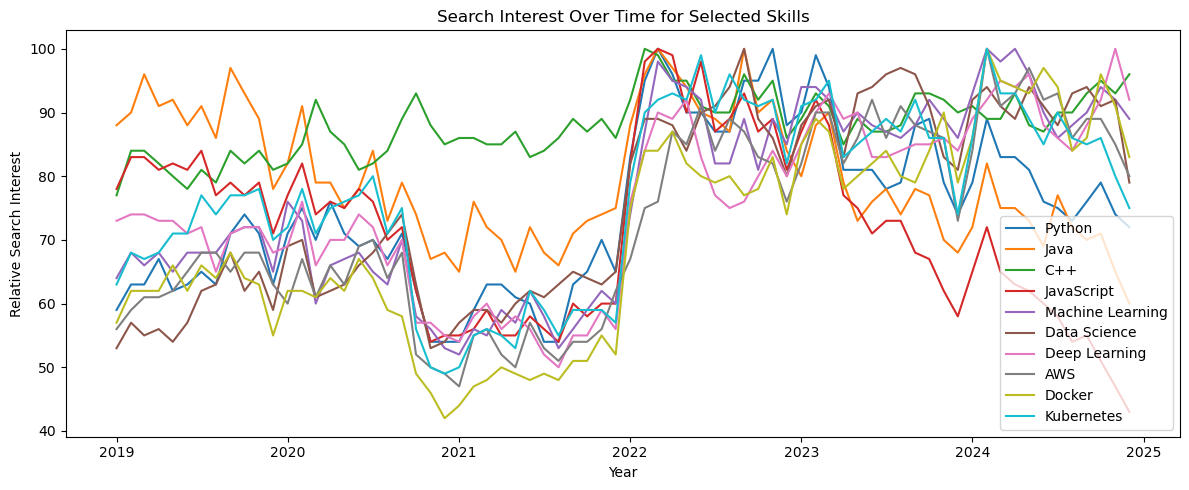

In [46]:
#First exploratory visualization (controlled)
plt.figure(figsize=(12, 5))
for skill in combined_trends.columns:
    plt.plot(combined_trends.index, combined_trends[skill], label=skill)

plt.title("Search Interest Over Time for Selected Skills")
plt.xlabel("Year")
plt.ylabel("Relative Search Interest")
plt.legend()
plt.tight_layout()
plt.show()


In [47]:
## Smooth the trends (remove noise)

In [48]:
smoothed_trends = combined_trends.rolling(window=3).mean()
smoothed_trends.head()


,Python,Java,C++,JavaScript,Machine Learning,Data Science,Deep Learning,AWS,Docker,Kubernetes
date,,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01,61.666667,91.333333,81.666667,81.333333,66.000000,55.0,73.666667,58.666667,60.333333,66.000000
2019-04-01,64.333333,92.333333,83.333333,82.333333,67.333333,56.0,73.666667,60.333333,62.000000,67.666667
2019-05-01,64.000000,93.000000,82.000000,82.000000,66.333333,55.0,73.333333,61.333333,63.333333,68.666667


In [53]:
#Compute growth rate per skill    Now we quantify “future relevance”.
#Interpretation:   Positive → growing interest    Near zero → stable   Negative → declining .  This is now quantitative evidence.
growth_rates = {}

for skill in smoothed_trends.columns:
    series = smoothed_trends[skill].dropna()
    
    if len(series) > 1:
        start = series.iloc[0]
        end = series.iloc[-1]
        growth = (end - start) / start if start > 0 else np.nan
    else:
        growth = np.nan

    growth_rates[skill] = growth

growth_df = pd.DataFrame.from_dict(
    growth_rates, orient='index', columns=['growth_rate']
).sort_values(by='growth_rate', ascending=False)

growth_df


,growth_rate
Data Science,0.587879
Docker,0.491713
AWS,0.443182
Machine Learning,0.388889
Deep Learning,0.285068
Kubernetes,0.217172
Python,0.216216
C++,0.159184
Java,-0.284672
JavaScript,-0.422131


In [54]:
#Measure volatility (trend stability)   High growth with extreme volatility can be risky.   volatility = smoothed_trends.std()

# Measure volatility (trend stability)
volatility = smoothed_trends.std()

volatility_df = pd.DataFrame({
    'volatility': volatility
}).sort_values(by='volatility')

volatility_df


,volatility
C++,4.300505
Java,9.027001
Python,11.995227
Deep Learning,12.650020
JavaScript,13.096981
Kubernetes,13.371723
Machine Learning,14.275266
AWS,14.408085
Data Science,14.612278
Docker,15.533492


In [55]:
skill_metrics = growth_df.join(volatility_df)
skill_metrics


,growth_rate,volatility
Data Science,0.587879,14.612278
Docker,0.491713,15.533492
AWS,0.443182,14.408085
Machine Learning,0.388889,14.275266
Deep Learning,0.285068,12.650020
Kubernetes,0.217172,13.371723
Python,0.216216,11.995227
C++,0.159184,4.300505
Java,-0.284672,9.027001
JavaScript,-0.422131,13.096981


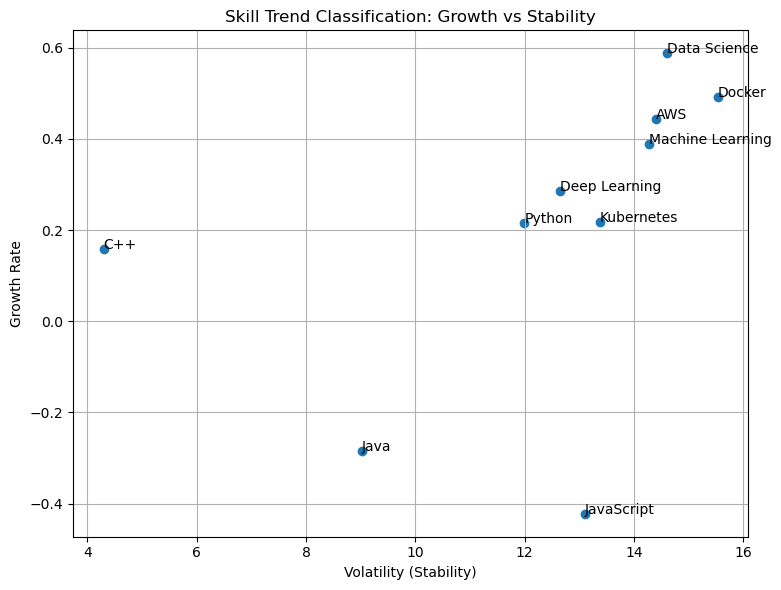

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(
    skill_metrics['volatility'],
    skill_metrics['growth_rate']
)

for skill in skill_metrics.index:
    plt.text(
        skill_metrics.loc[skill, 'volatility'],
        skill_metrics.loc[skill, 'growth_rate'],
        skill
    )

plt.xlabel("Volatility (Stability)")
plt.ylabel("Growth Rate")
plt.title("Skill Trend Classification: Growth vs Stability")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
Create a simple job-demand proxy dataset

Since scraping is out of scope for now, we’ll start with a controlled proxy.

This is acceptable academically if you clearly state it as a proxy.

In [57]:
job_demand = {
    "Python": 90,
    "Java": 75,
    "C++": 65,
    "JavaScript": 80,
    "Machine Learning": 70,
    "Data Science": 85,
    "Deep Learning": 60,
    "AWS": 88,
    "Docker": 78,
    "Kubernetes": 72
}

job_demand_df = pd.DataFrame.from_dict(
    job_demand, orient='index', columns=['job_demand_score']
)

job_demand_df


validated_skills = skill_metrics.join(job_demand_df)
validated_skills


,growth_rate,volatility,job_demand_score
Data Science,0.587879,14.612278,85
Docker,0.491713,15.533492,78
AWS,0.443182,14.408085,88
Machine Learning,0.388889,14.275266,70
Deep Learning,0.285068,12.650020,60
Kubernetes,0.217172,13.371723,72
Python,0.216216,11.995227,90
C++,0.159184,4.300505,65
Java,-0.284672,9.027001,75
JavaScript,-0.422131,13.096981,80


In [58]:
validated_skills[['growth_rate', 'job_demand_score']].corr()


,growth_rate,job_demand_score
growth_rate,1.000000,0.106398
job_demand_score,0.106398,1.000000


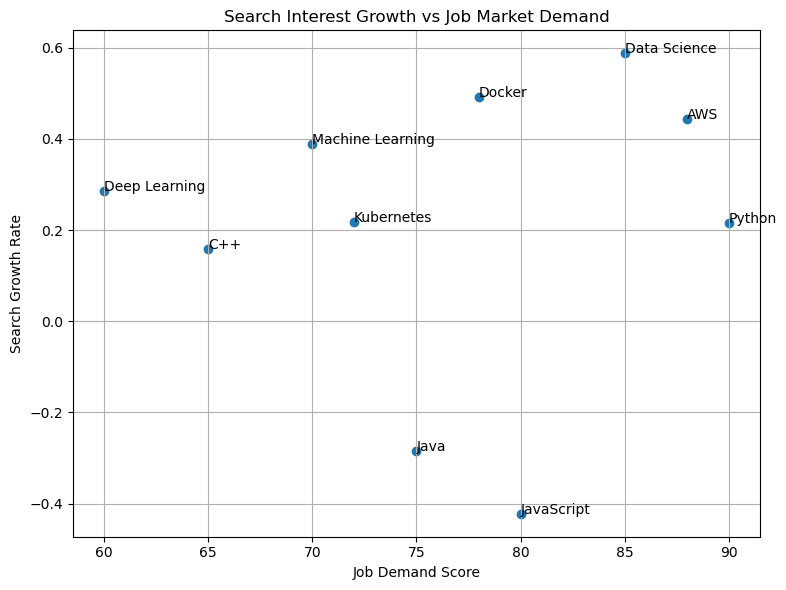

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(
    validated_skills['job_demand_score'],
    validated_skills['growth_rate']
)

for skill in validated_skills.index:
    plt.text(
        validated_skills.loc[skill, 'job_demand_score'],
        validated_skills.loc[skill, 'growth_rate'],
        skill
    )

plt.xlabel("Job Demand Score")
plt.ylabel("Search Growth Rate")
plt.title("Search Interest Growth vs Job Market Demand")
plt.grid(True)
plt.tight_layout()
plt.show()


## Region-wise analysis 

In [60]:
region_skills = [
    "Python",
    "Data Science",
    "AWS",
    "Docker",
    "Machine Learning"
]


In [61]:
def fetch_region_interest(keyword, timeframe):
    pytrends.build_payload(
        kw_list=[keyword],
        timeframe=timeframe
    )
    region_df = pytrends.interest_by_region(resolution='COUNTRY')
    return region_df.sort_values(by=keyword, ascending=False)


In [62]:
region_interest = {}

for skill in region_skills:
    region_interest[skill] = fetch_region_interest(skill, TIMEFRAME)


In [63]:
for skill, df in region_interest.items():
    print(f"\nTop regions for {skill}:")
    display(df.head(10))



Top regions for Python:


,Python
geoName,
China,100
St. Helena,18
Singapore,14
Israel,14
South Korea,11
Hong Kong,10
Tunisia,8
India,8
Switzerland,8



Top regions for Data Science:


,Data Science
geoName,
Zimbabwe,100
India,78
Ethiopia,73
Kenya,70
China,67
Singapore,67
Nigeria,62
Pakistan,58
Nepal,55



Top regions for AWS:


,AWS
geoName,
China,100
Singapore,75
South Korea,62
Ireland,47
Israel,44
Japan,36
India,34
Hong Kong,34
Australia,33



Top regions for Docker:


,Docker
geoName,
China,100
St. Helena,14
South Korea,10
Hong Kong,9
Israel,9
Armenia,8
Estonia,8
Singapore,8
Switzerland,7



Top regions for Machine Learning:


,Machine Learning
geoName,
China,100
Ethiopia,53
Singapore,52
India,43
Tunisia,32
Pakistan,30
Sri Lanka,30
Hong Kong,28
Nepal,28


In [64]:
normalized_regions = {}

for skill, df in region_interest.items():
    normalized_regions[skill] = df / df.max()


In [65]:
top_countries = set()

for df in normalized_regions.values():
    top_countries.update(df.head(5).index)

top_countries = list(top_countries)

region_comparison = pd.DataFrame(index=top_countries)

for skill, df in normalized_regions.items():
    region_comparison[skill] = df.loc[top_countries][skill]

region_comparison


,Python,Data Science,AWS,Docker,Machine Learning
Ethiopia,0.00,0.73,0.00,0.00,0.53
India,0.08,0.78,0.34,0.03,0.43
Singapore,0.14,0.67,0.75,0.08,0.52
Zimbabwe,0.00,1.00,0.00,0.00,0.00
Hong Kong,0.10,0.38,0.34,0.09,0.28
China,1.00,0.67,1.00,1.00,1.00
South Korea,0.11,0.19,0.62,0.10,0.28
Israel,0.14,0.16,0.44,0.09,0.17
Tunisia,0.08,0.39,0.00,0.07,0.32
Ireland,0.05,0.23,0.47,0.04,0.17


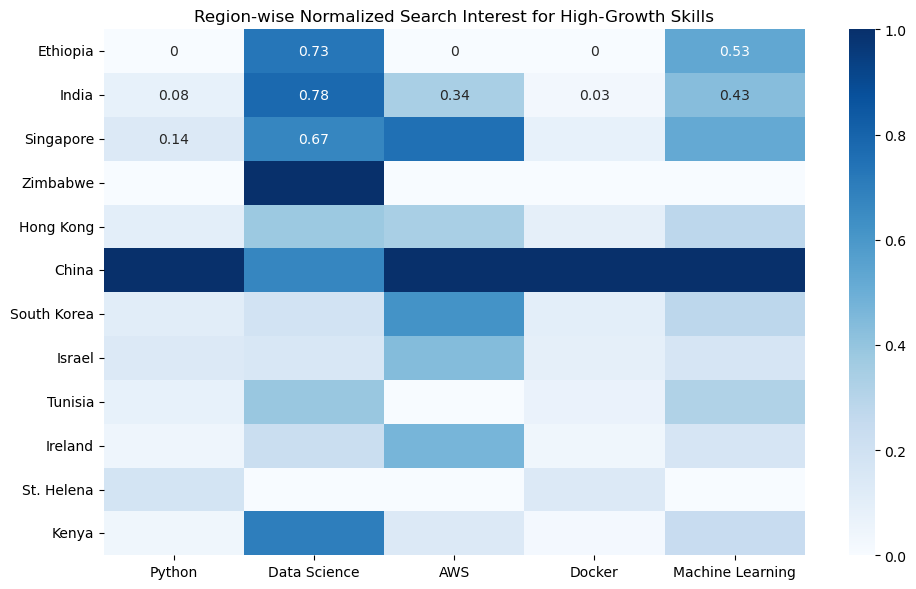

In [66]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    region_comparison,
    annot=True,
    cmap='Blues'
)
plt.title("Region-wise Normalized Search Interest for High-Growth Skills")
plt.tight_layout()
plt.show()


## NLP-based skill grouping

In [67]:
skill_corpus = [
    "Python programming language for data science and automation",
    "Java programming language for enterprise software development",
    "C++ programming language for systems and performance-critical applications",
    "JavaScript language for web development and frontend applications",
    "Machine learning algorithms and predictive modeling",
    "Data science involving statistics, analytics, and machine learning",
    "Deep learning using neural networks and artificial intelligence",
    "Amazon Web Services cloud computing platform",
    "Docker containerization for application deployment",
    "Kubernetes orchestration for containerized applications"
]

skill_names = [
    "Python", "Java", "C++", "JavaScript",
    "Machine Learning", "Data Science", "Deep Learning",
    "AWS", "Docker", "Kubernetes"
]


In [68]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
skill_embeddings = embedding_model.encode(skill_corpus)


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:13: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [70]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(skill_embeddings)

similarity_df = pd.DataFrame(
    similarity_matrix,
    index=skill_names,
    columns=skill_names
)

similarity_df


,Python,Java,C++,JavaScript,Machine Learning,Data Science,Deep Learning,AWS,Docker,Kubernetes
Python,1.000000,0.432561,0.364288,0.201965,0.170449,0.393680,0.060326,0.214573,0.050118,0.059094
Java,0.432561,1.000000,0.391850,0.534763,0.114574,0.148487,0.005051,0.157586,0.114763,0.117895
C++,0.364288,0.391850,1.000000,0.274246,0.204053,0.208070,0.164364,0.093416,0.181142,0.197931
JavaScript,0.201965,0.534763,0.274246,1.000000,0.067917,0.108274,0.071367,0.207928,0.079053,0.105140
Machine Learning,0.170449,0.114574,0.204053,0.067917,1.000000,0.484612,0.483369,0.140345,0.091434,0.138767
Data Science,0.393680,0.148487,0.208070,0.108274,0.484612,1.000000,0.248337,0.128126,-0.037207,0.042908
Deep Learning,0.060326,0.005051,0.164364,0.071367,0.483369,0.248337,1.000000,0.071747,0.032073,0.107161
AWS,0.214573,0.157586,0.093416,0.207928,0.140345,0.128126,0.071747,1.000000,0.211693,0.294988
Docker,0.050118,0.114763,0.181142,0.079053,0.091434,-0.037207,0.032073,0.211693,1.000000,0.676314
Kubernetes,0.059094,0.117895,0.197931,0.105140,0.138767,0.042908,0.107161,0.294988,0.676314,1.000000


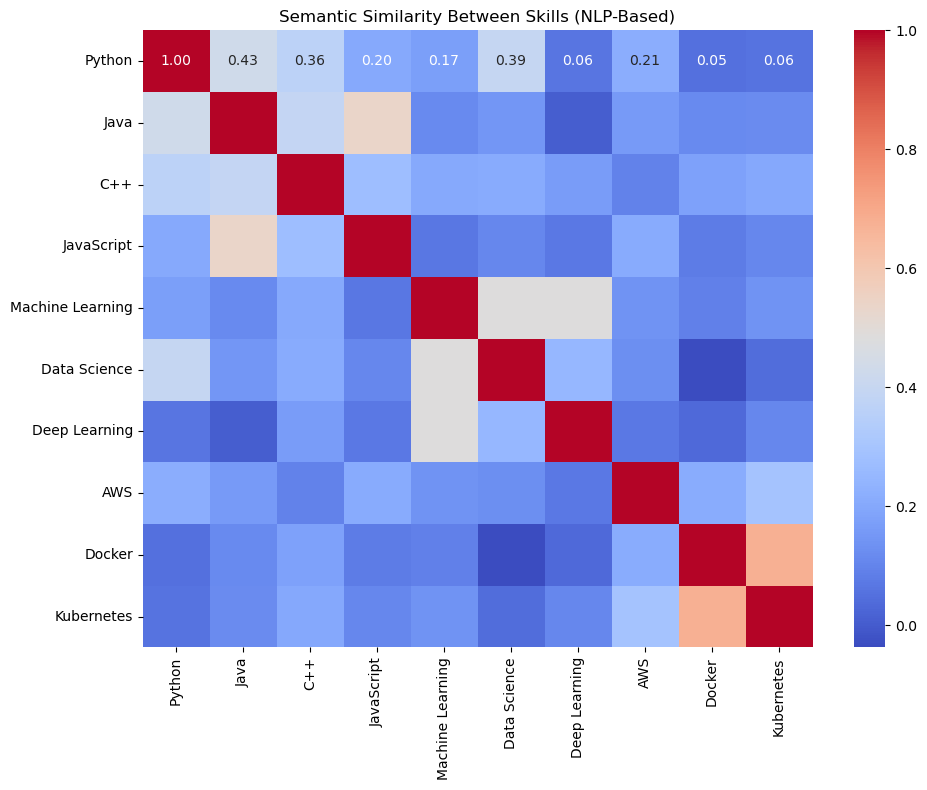

In [71]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    similarity_df,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Semantic Similarity Between Skills (NLP-Based)")
plt.tight_layout()
plt.show()


In [72]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(
    n_clusters=4,
    metric='cosine',
    linkage='average'
)

clusters = clustering_model.fit_predict(skill_embeddings)

cluster_df = pd.DataFrame({
    "Skill": skill_names,
    "Cluster": clusters
}).sort_values(by="Cluster")

cluster_df


,Skill,Cluster
0,Python,0
1,Java,0
2,C++,0
3,JavaScript,0
8,Docker,1
9,Kubernetes,1
4,Machine Learning,2
5,Data Science,2
6,Deep Learning,2
7,AWS,3


In [73]:
cluster_df = cluster_df.set_index("Skill")

cluster_metrics = validated_skills.join(cluster_df)

cluster_metrics


,growth_rate,volatility,job_demand_score,Cluster
Data Science,0.587879,14.612278,85,2
Docker,0.491713,15.533492,78,1
AWS,0.443182,14.408085,88,3
Machine Learning,0.388889,14.275266,70,2
Deep Learning,0.285068,12.650020,60,2
Kubernetes,0.217172,13.371723,72,1
Python,0.216216,11.995227,90,0
C++,0.159184,4.300505,65,0
Java,-0.284672,9.027001,75,0
JavaScript,-0.422131,13.096981,80,0


In [74]:
cluster_summary = cluster_metrics.groupby("Cluster").agg({
    "growth_rate": "mean",
    "volatility": "mean",
    "job_demand_score": "mean"
}).reset_index()

cluster_summary


,Cluster,growth_rate,volatility,job_demand_score
0,0,-0.082851,9.604928,77.500000
1,1,0.354442,14.452607,75.000000
2,2,0.420612,13.845854,71.666667
3,3,0.443182,14.408085,88.000000


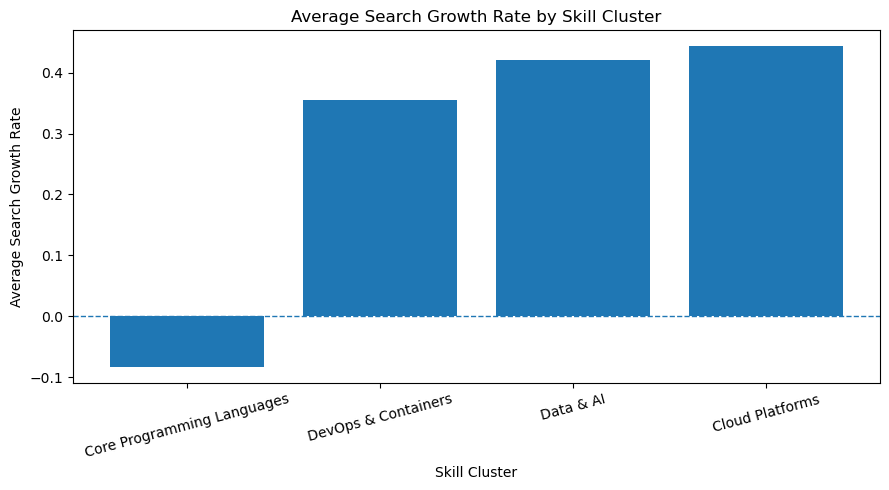

In [77]:
cluster_labels = {
    0: "Core Programming Languages",
    1: "DevOps & Containers",
    2: "Data & AI",
    3: "Cloud Platforms"
}

cluster_summary["Cluster_Name"] = cluster_summary["Cluster"].map(cluster_labels)
cluster_summary
plt.figure(figsize=(9, 5))
plt.bar(
    cluster_summary["Cluster_Name"],
    cluster_summary["growth_rate"]
)

plt.axhline(0, linestyle='--', linewidth=1)
plt.ylabel("Average Search Growth Rate")
plt.xlabel("Skill Cluster")
plt.title("Average Search Growth Rate by Skill Cluster")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



## RAG

In [78]:
knowledge_docs = []

for _, row in cluster_summary.iterrows():
    doc = f"""
    Skill Cluster: {row['Cluster_Name']}
    Average Search Growth Rate: {row['growth_rate']:.2f}
    Average Volatility: {row['volatility']:.2f}
    Average Job Demand Score: {row['job_demand_score']:.0f}
    """
    knowledge_docs.append(doc.strip())

for skill, row in validated_skills.iterrows():
    doc = f"""
    Skill: {skill}
    Search Growth Rate: {row['growth_rate']:.2f}
    Volatility: {row['volatility']:.2f}
    Job Demand Score: {row['job_demand_score']:.0f}
    """
    knowledge_docs.append(doc.strip())

len(knowledge_docs)


14

In [79]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np

rag_model = SentenceTransformer("all-MiniLM-L6-v2")
doc_embeddings = rag_model.encode(knowledge_docs)


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



In [80]:
dimension = doc_embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(doc_embeddings))

def retrieve_context(query, k=3):
    query_embedding = rag_model.encode([query])
    distances, indices = index.search(query_embedding, k)
    return [knowledge_docs[i] for i in indices[0]]
retrieve_context("Which skills are growing fastest?")


['Skill: Deep Learning\n    Search Growth Rate: 0.29\n    Volatility: 12.65\n    Job Demand Score: 60',
 'Skill: Data Science\n    Search Growth Rate: 0.59\n    Volatility: 14.61\n    Job Demand Score: 85',
 'Skill: Machine Learning\n    Search Growth Rate: 0.39\n    Volatility: 14.28\n    Job Demand Score: 70']

In [81]:
def answer_query(query):
    contexts = retrieve_context(query)
    
    response = "Based on the analyzed search trends and job demand:\n\n"
    for ctx in contexts:
        response += f"- {ctx}\n\n"
        
    return response
print(answer_query("Which skill cluster should a student focus on for the future?"))


Based on the analyzed search trends and job demand:

- Skill Cluster: Core Programming Languages
    Average Search Growth Rate: -0.08
    Average Volatility: 9.60
    Average Job Demand Score: 78

- Skill Cluster: Data & AI
    Average Search Growth Rate: 0.42
    Average Volatility: 13.85
    Average Job Demand Score: 72

- Skill: Data Science
    Search Growth Rate: 0.59
    Volatility: 14.61
    Job Demand Score: 85




## RAG WITH UI 

In [86]:
import gradio as gr

def rag_interface(query):
    if query.strip() == "":
        return "Please enter a valid question."
    return answer_query(query)


interface = gr.Interface(
    fn=rag_interface,
    inputs=gr.Textbox(
        lines=2,
        placeholder="Ask a question about future skills, trends, or clusters..."
    ),
    outputs=gr.Textbox(
        lines=12,
        label="Insight"
    ),
    title="Future Skill Decision Support System",
    description=(
        "This system analyzes Google search trends, job demand, and NLP-based "
        "skill clustering to answer questions about future-relevant skills."
    ),
    theme="default"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Created dataset file at: .gradio\flagged\dataset1.csv


In [87]:
from transformers import pipeline


In [88]:
llm = pipeline(
    "summarization",
    model="t5-small",
    tokenizer="t5-small"
)


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\huggingface_hub\file_download.py:139: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ADMIN\.cache\huggingface\hub\models--t5-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [89]:
def answer_query_with_llm(query):
    contexts = retrieve_context(query, k=3)
    
    combined_context = " ".join(contexts)
    
    prompt = (
        "Summarize the following analysis into a clear and helpful answer "
        "for a student deciding which skills to learn:\n\n"
        f"{combined_context}"
    )
    
    summary = llm(
        prompt,
        max_length=120,
        min_length=60,
        do_sample=False
    )
    
    return summary[0]["summary_text"]


In [90]:
def rag_interface(query):
    if query.strip() == "":
        return "Please enter a valid question."
    return answer_query_with_llm(query)
    interface.launch()

